# EPICS4 PV access example

Outside of this Jupyter notebook
- start the GUI, which will start the P4P server
```bash
$ python scripts/devGui.py --ip <RFSOC_IP_ADDDRESS>
```

In [1]:
# setup the P4P client
# https://mdavidsaver.github.io/p4p/client.html#usage
import numpy as np
import time
import matplotlib.pyplot as plt
from p4p.client.thread import Context
print( Context.providers() )
ctxt = Context('pva')

# Some useful pointers to reduce string lengths
Root = 'kek_bpm_rfsoc_demo_ioc:Root'
AxiVersion  = f'{Root}:RFSoC:AxiSocCore:AxiVersion'
ReadoutCtrl = f'{Root}:RFSoC:Application:ReadoutCtrl'
AdcDispProcessor  = [ f'{Root}:AdcDispProcessor[{i}]'  for i in range(4)]
AmpDispProcessor  = [ f'{Root}:AmpDispProcessor[{i}]'  for i in range(4)]
AmpFaultProcessor = [ f'{Root}:AmpFaultProcessor[{i}]' for i in range(4)]
BpmDispProcessor = f'{Root}:BpmDispProc'
BpmFaultProcessor = f'{Root}:BpmFaultProc'

['pva']


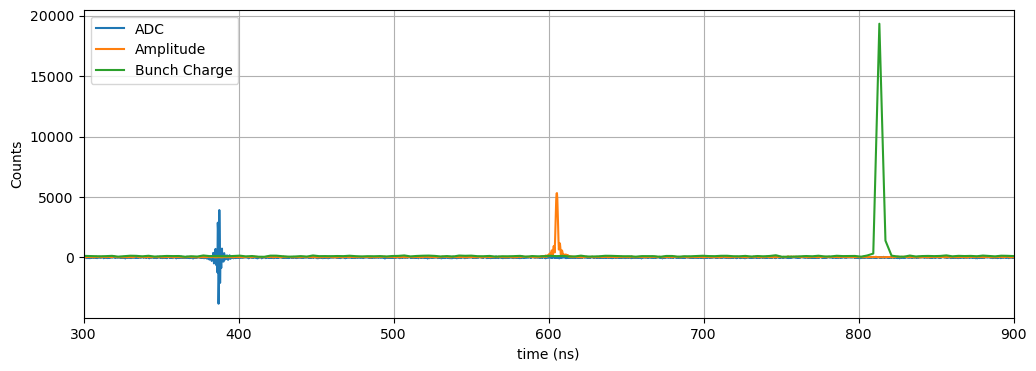

In [19]:
# Trigger the Live display
#TrigRingBuffer(trigType='liveDisplay')

ch=0
x_adc = ctxt.get(f'{AdcDispProcessor[ch]}:Time')
y_adc = ctxt.get(f'{AdcDispProcessor[ch]}:WaveformData')
x_amp = ctxt.get(f'{AmpDispProcessor[ch]}:Time')
y_amp = ctxt.get(f'{AmpDispProcessor[ch]}:WaveformData')
x_charge = ctxt.get(f'{BpmDispProcessor}:Time')
y_charge = ctxt.get(f'{BpmDispProcessor}:BunchCharge') 

plt.figure(figsize=(12,4))
plt.plot(x_adc,y_adc,label='ADC')
plt.plot(x_amp,y_amp,label='Amplitude')
plt.plot(x_charge,y_charge,label='Bunch Charge')
plt.xlabel('time (ns)')
plt.ylabel('Counts')
plt.grid()
plt.legend()
plt.xlim(300,900)
#plt.savefig('latency.png',dpi=150)
plt.show()

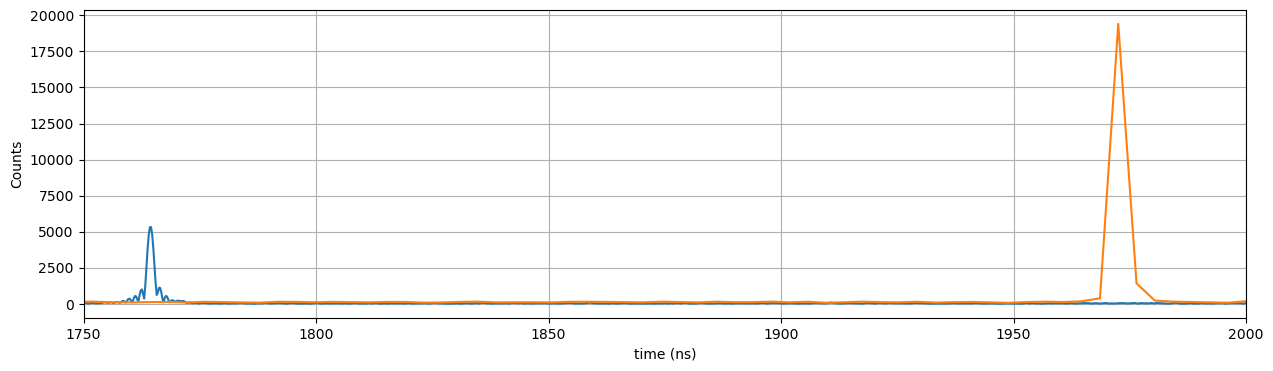

In [7]:
ch=0
x_amp = ctxt.get(f'{AmpFaultProcessor[ch]}:Time')
y_amp = ctxt.get(f'{AmpFaultProcessor[ch]}:WaveformData')
x_charge = ctxt.get(f'{BpmFaultProcessor}:Time')
y_charge = ctxt.get(f'{BpmFaultProcessor}:BunchCharge') 

plt.figure(figsize=(15,4))
plt.plot(x_amp,y_amp)
plt.plot(x_charge,y_charge)
plt.xlabel('time (ns)')
plt.ylabel('Counts')
plt.grid()
plt.xlim(1750,2000)
plt.show()